##     Telecom Customer Churn Prediction Implemented by Using Handling Imbalanced Data 
Customer Churn Prediction is to Measure why Customers are leaving a Business.Here Iam looking at Customer Churn in Telecom Business. We will build a deep Learning Model to predict the churn and use precision,Recall, F1-score to Measure Performance of our model. We will then Handle imbalance in Data using Various Techniques and improve f1-score

In [266]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [267]:
import warnings
warnings.filterwarnings('ignore')

In [268]:
df=pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [269]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [270]:
517400/df.shape[0] 

73.46301292063042

In [271]:
df.drop('customerID',axis='columns',inplace=True) 

In [272]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [273]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Ahh... it is string. Lets convert it to numbers

In [274]:

pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [275]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [276]:
df.shape

(7043, 20)

In [277]:
df.iloc[488].TotalCharges


' '

In [278]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Remove rows with space in TotalCharges

In [279]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [280]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [281]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [282]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [283]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Data Visualization

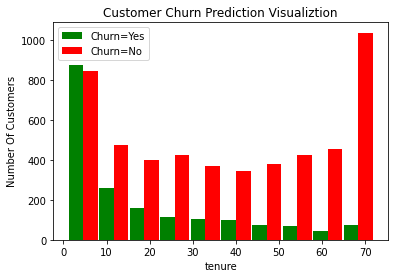

In [284]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

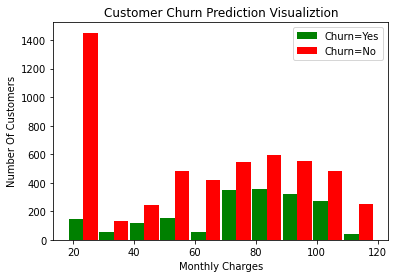

In [285]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [286]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [287]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [288]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [289]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


###   Convert Yes and No to 1 or 0

In [290]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [291]:

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [292]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [293]:
df1.gender.unique()

array([1, 0], dtype=int64)

# One hot encoding for categorical columns

In [294]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [295]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5405,0,0,0,1,34,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3233,0,1,1,0,4,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4337,1,1,0,0,71,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2605,1,0,0,0,13,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4543,0,0,1,1,41,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [296]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [297]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [298]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Train test split

In [299]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [300]:
y_train.value_counts()


0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [301]:

y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [302]:
5163/1869

2.7624398073836276

In [303]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [304]:
X_train.shape

(5625, 26)

In [305]:

X_test.shape


(1407, 26)

In [306]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [307]:
len(X_train.columns)

26

# Build a model (ANN) using tensorflow/keras libaries

In [308]:
#pip install -q -U tensorflow-addons

In [309]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [310]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [311]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.7556
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7966
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8027
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accura

# Mitigating Skewdness of Data
### Method 1: Undersampling
reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [312]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [313]:
count_class_0, count_class_1 

(5163, 1869)

In [314]:
df_class_0.shape

(5163, 27)

In [315]:
df_class_1.shape

(1869, 27)

In [316]:
count_class_0

5163

In [317]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [318]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape


(3738, 27)

In [319]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [320]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
#stratify argument use for same number of value counts in both spliting of test ans training data 

In [321]:
len(X_train)

2990

In [322]:
len(X_test)

748

In [323]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [324]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6192 - accuracy: 0.6913
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7411
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7538
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7575
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7692
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8110
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8050
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8054
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8087
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8094
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8124
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8057
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8087
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8104
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8064
Epoch 93/100


### Check classification report above. f1-score for minority class 1 improved from 0.59 to 0.75.Score for class 0 reduced to 0.77 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method2: Oversamplinng

In [325]:
count_class_0,count_class_1

(5163, 1869)

In [326]:
df_class_1.sample(200).shape

(200, 27)

In [327]:
df_class_1.sample(2000,replace=True).shape

(2000, 27)

In [328]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [329]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,1,1,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6240,0,0,0,1,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5702,0,1,1,1,0.985915,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
2703,1,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [330]:
df_test_over.shape

(10326, 27)

In [331]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [332]:

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [333]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [334]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [335]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5697 - accuracy: 0.7019
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.7646
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4798 - accuracy: 0.7680
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7728
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7762
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7786
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7788
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.7815
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7834
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4560 - accura

### Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.82 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

## Method3: SMOTE
oversampling by producing syncthstic samples
SMOTE is bettern beacause it is creating new samples out of current samples and it uses k neighbour alogrithm for that


To install imbalanced-learn library use pip install imbalanced-learn command

In [336]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [337]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [338]:
from imblearn.over_sampling import SMOTE

In [339]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [342]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [343]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [344]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.7513
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.7760
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.7827
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.7841
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.7863
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.7890
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7914
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.7929
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.7982
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4322 - accura

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.80 which very good improvement Also over all accuracy improves from 78% to 81%

# Method4: Use of Ensemble with undersampling

In [345]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [346]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [348]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [349]:
4130/1495


2.762541806020067

In [350]:
4130/3


1376.6666666666667

In [351]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [352]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [353]:
y_train

684     0
2446    1
1680    0
2220    0
2842    0
       ..
6957    0
845     0
6419    0
3920    0
4196    0
Name: Churn, Length: 5625, dtype: int64

In [354]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1] 

In [355]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [356]:
df3_class0[:1495]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,1,0,1,1,0.788732,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1992,1,0,0,0,0.225352,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
6164,0,1,1,0,0.619718,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
5302,1,0,1,1,0.126761,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [357]:
df3_class0[:1495].shape

(1495, 27)

In [358]:
df_train=pd.concat([df3_class0[:1495],df3_class1],axis=0)
df_train.shape
    #df_train=pd.concat([df3_class0[:1495],df3_class1],axis=0) similar to this below step

(2990, 27)

In [359]:
def get_train_batch(df_majority, df_minority, start, end):
    #df_train=pd.concat([df3_class0[:1495],df3_class1],axis=0) similar to this below step
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [360]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
# 1495 values of df3_class0

In [361]:
X_train.shape

(2990, 26)

In [362]:
X_train.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
1       0              0        0           0.000000  1             0              0               0             0                 0            0            0                0                 0.026368        0.000242      0                    0                            1                   1                        0                  0                  0                                        0                                      0                               1                             3
       

In [363]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6030 - accuracy: 0.6990
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7666
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7739
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8147
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8244
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8184
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8214
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8171
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8194
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8197
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8244
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8211
Epoch 93/100


In [364]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.6763
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7545
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7656
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7669
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7696
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7706
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8194
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8214
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8234
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8211
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8184
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8258
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8224
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8231
Epoch 93/100


In [365]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.6395
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7643
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7662
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7765
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7727
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7810
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7806
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7810
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7867
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8220
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8288
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8216
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8235
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8304
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8296
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8277
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8292
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8288
Epoch 92/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8326
Epoch 93/100


In [366]:
vote1 =1
vote2 =0
vote3 =0

vote1+vote2+vote3

1

In [367]:
len(y_pred3)

1407

In [368]:
y_pred_final = y_pred1.copy( )
y_pred_final

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [369]:
y_pred_final = y_pred1.copy( )
for i in range(len(y_pred1)):
    no_of_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    
    if no_of_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [370]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



### f1-score for minority class 1 improved to 0.81from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but  we have at least there is some balance in terms of prediction accuracy across two classes